# 1. Importing Libraries

In [1]:
# Importing necessary libraries

# Data handling and manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Data fetching
import yfinance as yf
from pandas_datareader import data as pdr

# Machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Deep learning
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Date and time management
from datetime import datetime


# 2. Data Fetching and Preprocessing

In [2]:
# Override pandas_datareader's DataReader method
yf.pdr_override()

# Define the tech_list and company_name based on the provided list
tech_list = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'XRP-USD']
company_name = ["Bitcoin", "Ethereum", "Tether", "Binance Coin", "XRP"]

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Downloading data for each cryptocurrency and storing them in individual DataFrames
company_data = {}
for crypto in tech_list:
    company_data[crypto] = yf.download(crypto, start, end)
    company_data[crypto]["company_name"] = company_name[tech_list.index(crypto)]

# Concatenate all individual DataFrames into a single DataFrame
df = pd.concat([company_data[crypto] for crypto in tech_list], axis=0)

# Display the last 10 rows of the combined DataFrame
print(df.tail(10))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
2023-11-19  0.611187  0.628720  0.603043  0.627499   0.627499   960738459   
2023-11-20  0.627420  0.627888  0.612231  0.612842   0.612842  1151372006   
2023-11-21  0.612834  0.617820  0.579289  0.580462   0.580462  1664786743   
2023-11-22  0.580443  0.615112  0.579437  0.611899   0.611899  1332443782   
2023-11-23  0.611860  0.622757  0.607326  0.620242   0.620242  1233580691   
2023-11-24  0.620250  0.625278  0.617526  0.621881   0.621881  1220784875   
2023-11-25  0.621858  0.623475  0.61692

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-11-29,16217.639648,16522.257812,16139.396484,16444.982422,16444.982422,23581685468,Bitcoin
2022-11-30,16445.476562,17190.937500,16445.476562,17168.566406,17168.566406,29523576583,Bitcoin
2022-12-01,17168.001953,17197.498047,16888.388672,16967.132812,16967.132812,22895392882,Bitcoin
2022-12-02,16968.683594,17088.660156,16877.880859,17088.660156,17088.660156,19539705127,Bitcoin
2022-12-03,17090.097656,17116.041016,16888.140625,16908.236328,16908.236328,16217776704,Bitcoin


In [4]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

# 3. Data Visualization

data/Bitcoin_Historical_Closing_Prices.png


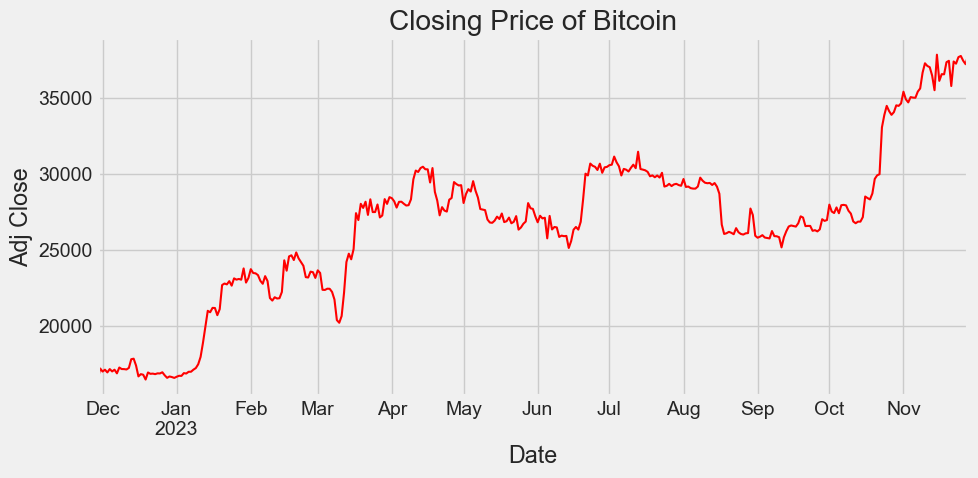

data/Ethereum_Historical_Closing_Prices.png


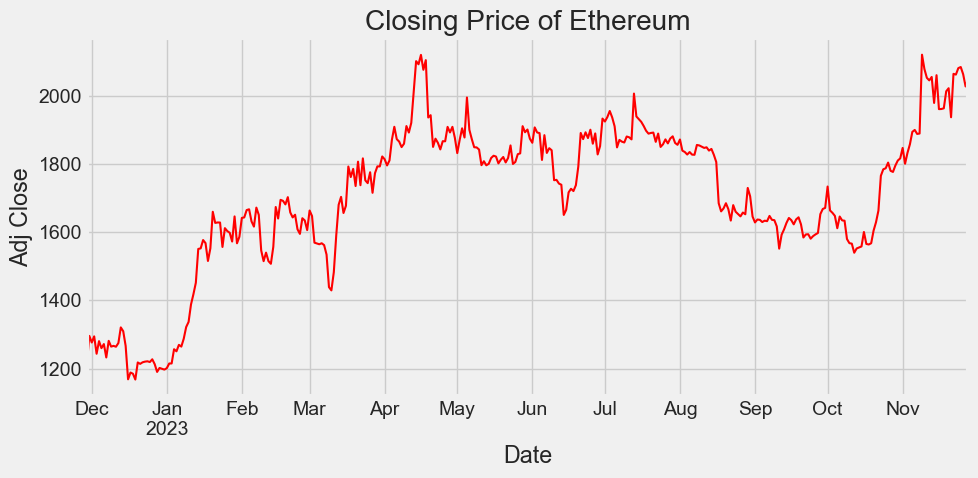

data/Tether_Historical_Closing_Prices.png


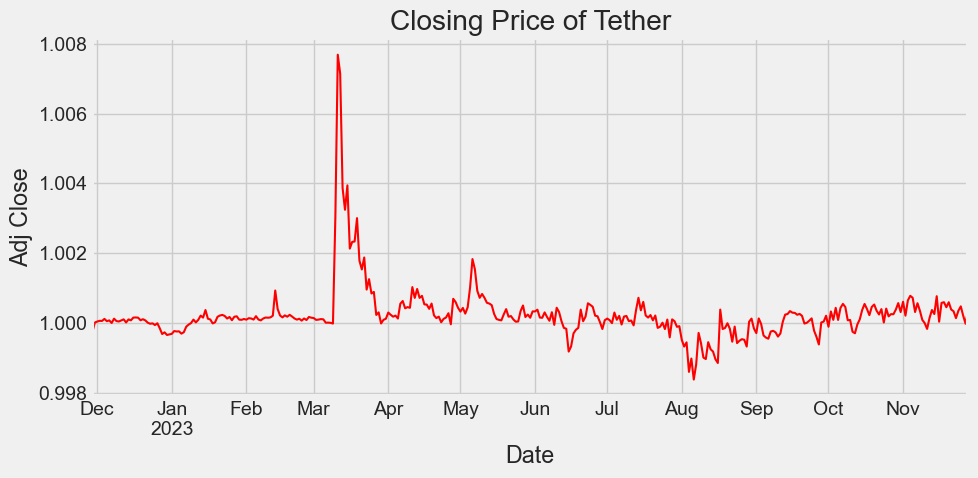

data/Binance Coin_Historical_Closing_Prices.png


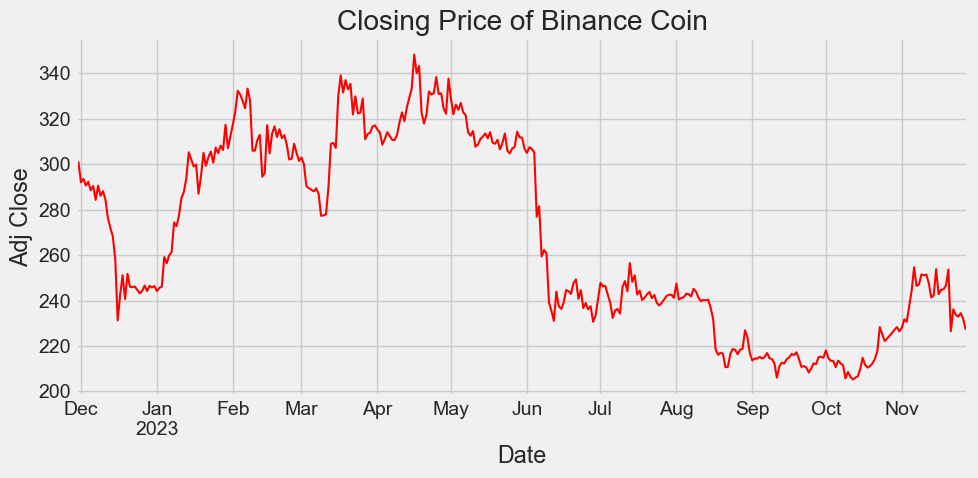

data/XRP_Historical_Closing_Prices.png


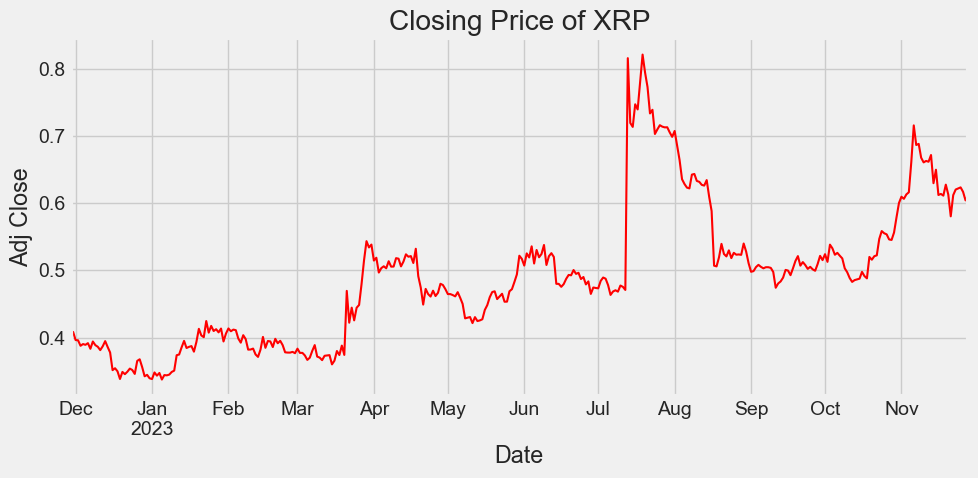

In [5]:
for i, company in enumerate(tech_list):
    plt.figure(figsize=(10, 5))  # Set the figure size for each plot
    company_data[company]['Adj Close'].plot(linewidth=1.5, color='red')  # Adjusted linewidth and color here
    plt.ylabel('Adj Close')
    plt.title(f"Closing Price of {company_name[i]}")
    plt.tight_layout()
    plt.savefig(f"data/{company_name[i]}_Historical_Closing_Prices.png")  # Save each figure with a respective name
    print((f"data/{company_name[i]}_Historical_Closing_Prices.png"))
    plt.show()  # Optionally show the figure


data/Sales_Volume_Bitcoin.png


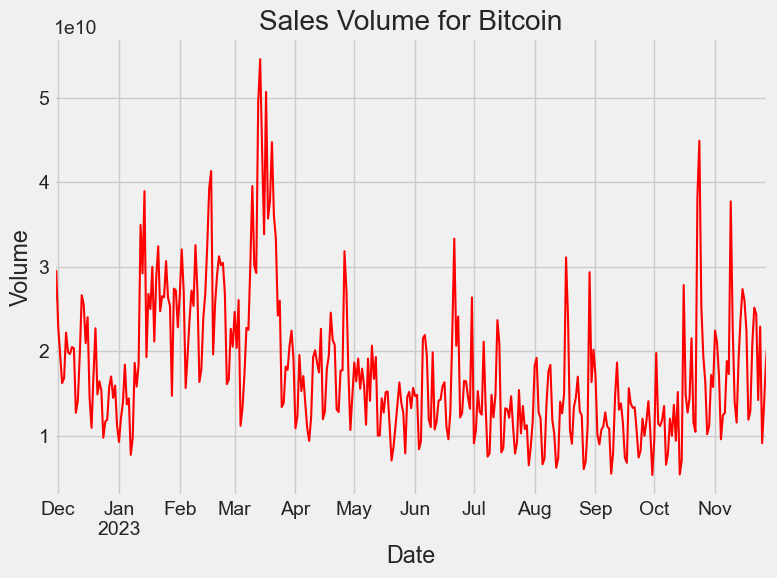

data/Sales_Volume_Ethereum.png


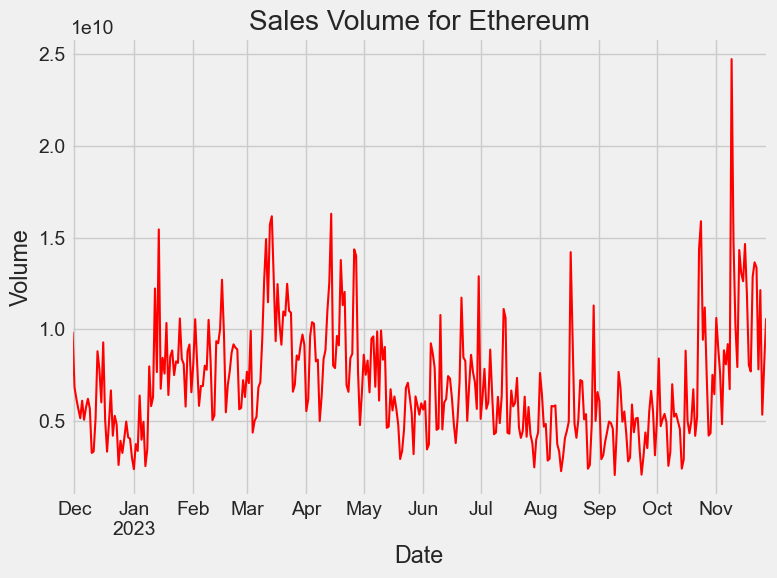

data/Sales_Volume_Tether.png


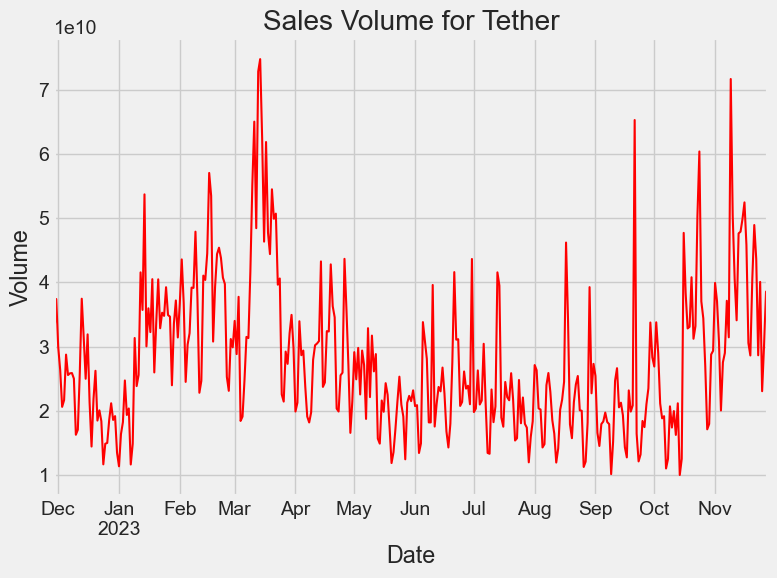

data/Sales_Volume_Binance Coin.png


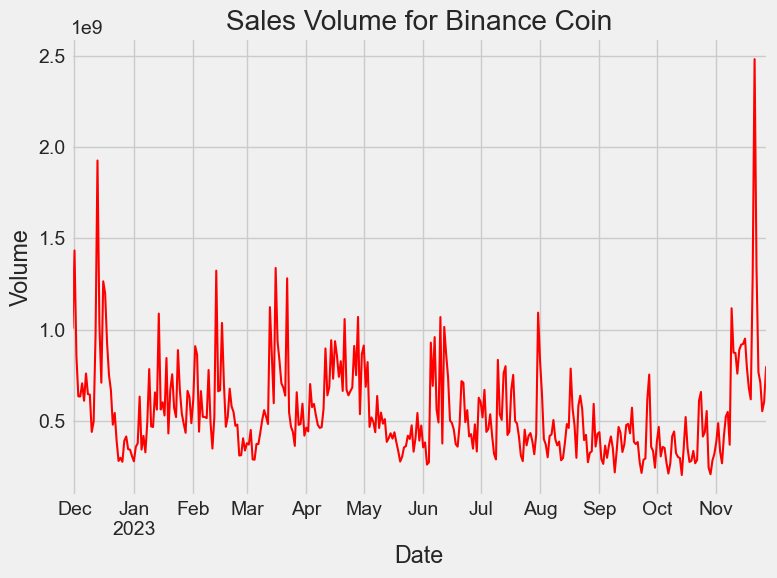

data/Sales_Volume_XRP.png


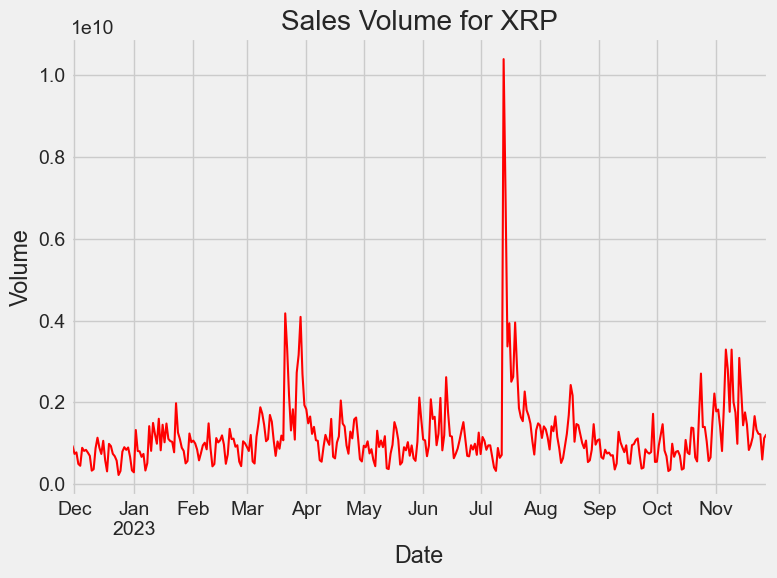

In [6]:
for i, company in enumerate(tech_list):
    plt.figure(figsize=(8, 6))  # Create a new figure for each company
    company_data[company]['Volume'].plot(linewidth=1.5, color='red')
    plt.ylabel('Volume')
    plt.title(f"Sales Volume for {company_name[i]}")
    plt.tight_layout()
    plt.savefig(f"data/Sales_Volume_{company_name[i]}.png")  # Save each figure with a unique filename
    print(f"data/Sales_Volume_{company_name[i]}.png")
    plt.show()  # Optional: Show each figure


# 4. Feature Engineering

data/Moving_Averages_Bitcoin.png


<Figure size 1000x600 with 0 Axes>

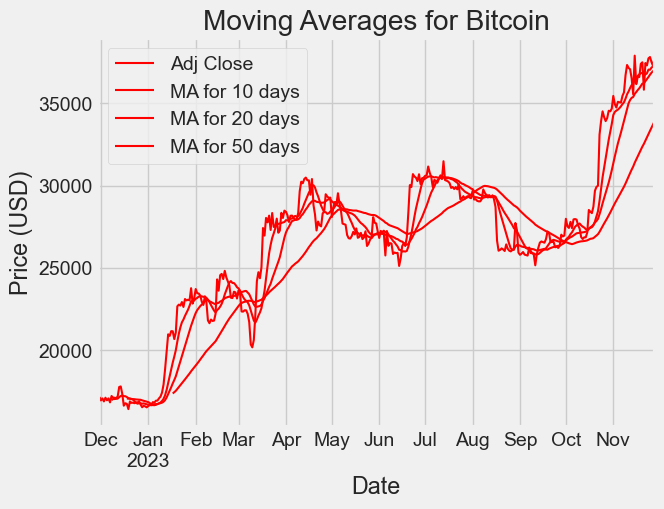

data/Moving_Averages_Ethereum.png


<Figure size 1000x600 with 0 Axes>

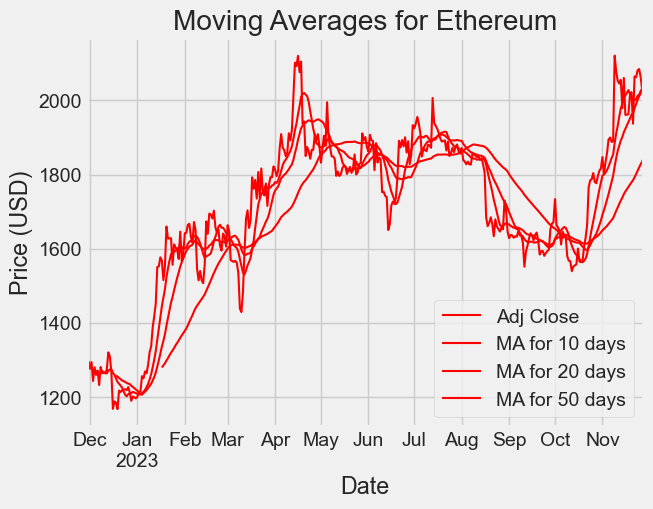

data/Moving_Averages_Tether.png


<Figure size 1000x600 with 0 Axes>

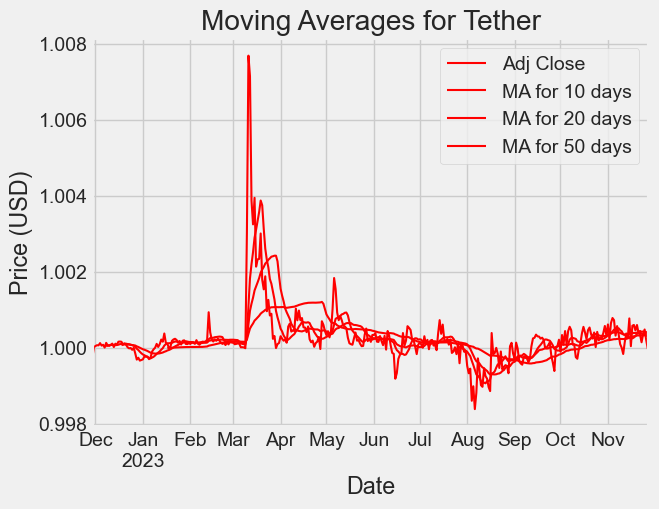

data/Moving_Averages_Binance Coin.png


<Figure size 1000x600 with 0 Axes>

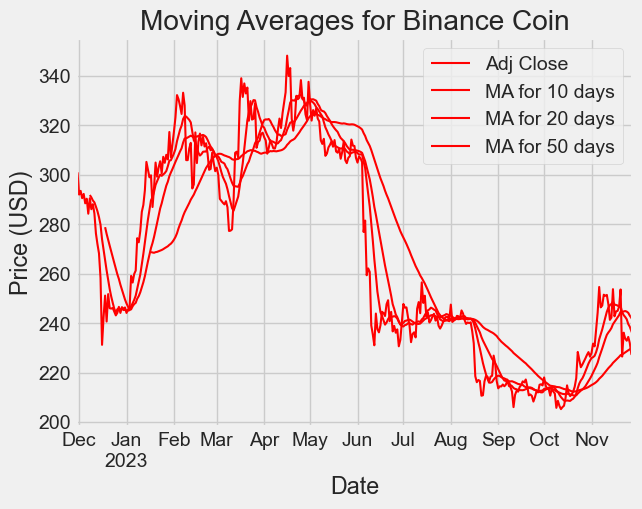

data/Moving_Averages_XRP.png


<Figure size 1000x600 with 0 Axes>

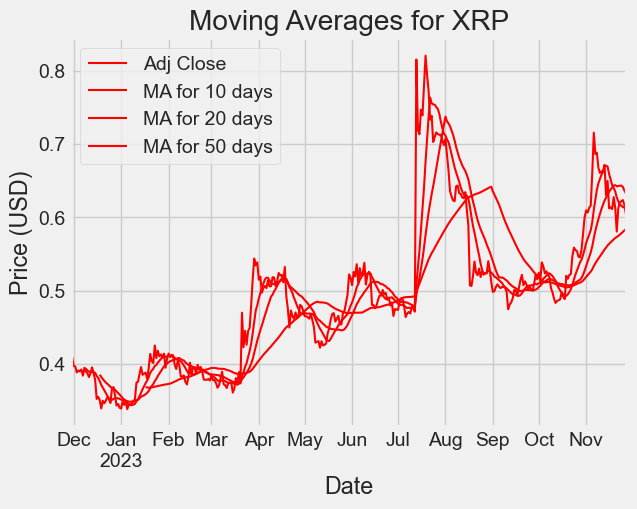

In [7]:
ma_day = [10, 20, 50]

for company, name in zip(tech_list, company_name):
    # Calculate moving averages for each cryptocurrency
    for ma in ma_day:
        column_name = f"MA for {ma} days"
        company_data[company][column_name] = company_data[company]['Adj Close'].rolling(ma).mean()
    
    # Create a new figure for each cryptocurrency
    plt.figure(figsize=(10, 6))
    
    # Plot the adjusted close price and moving averages
    company_data[company][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(linewidth=1.5, color='red')
    
    # Set the title and labels
    plt.title(f'Moving Averages for {name}')
    plt.ylabel('Price (USD)')
    plt.xlabel('Date')
    
    # Save the figure to a file
    plt.savefig(f"data/Moving_Averages_{name}.png")
    print(f"data/Moving_Averages_{name}.png")
    
    # Optional: Show the plot
    plt.show()
    
    # Optional: Close the plot to free up memory
    plt.close()


# 5. Daily Return Analysis

data/Daily_Returns_Over_Time_Bitcoin.png


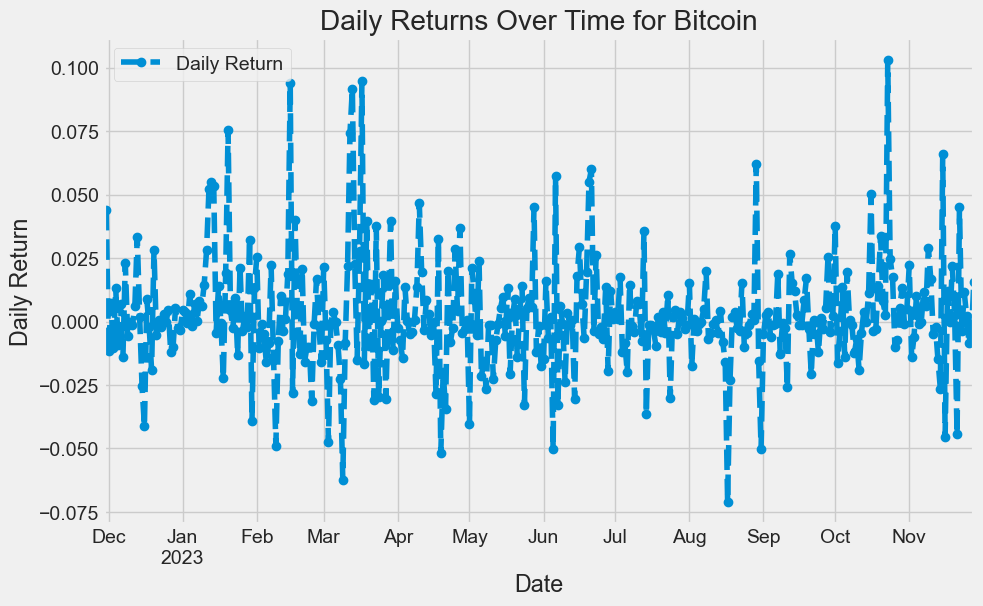

data/Daily_Returns_Over_Time_Ethereum.png


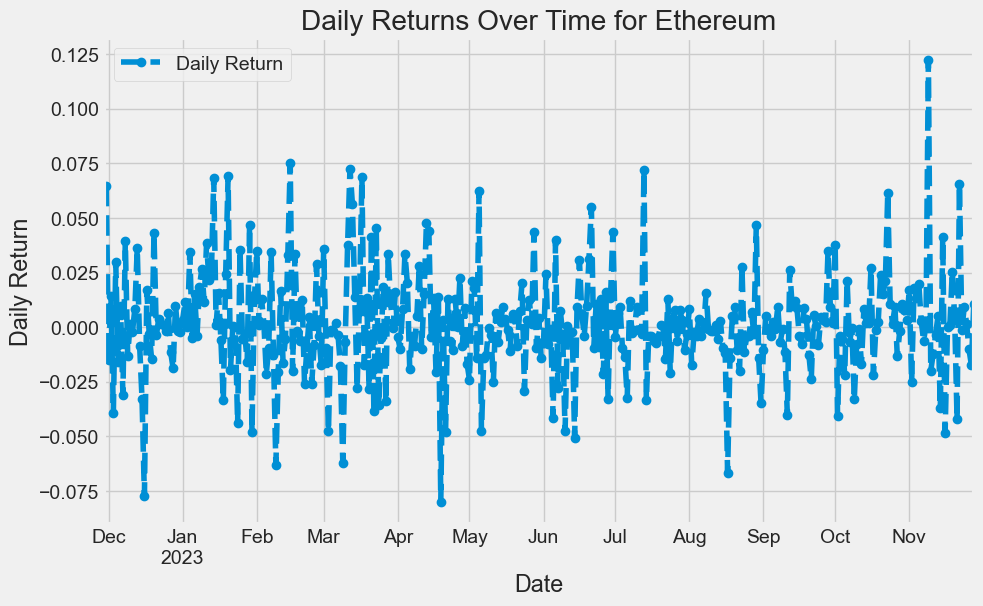

data/Daily_Returns_Over_Time_Tether.png


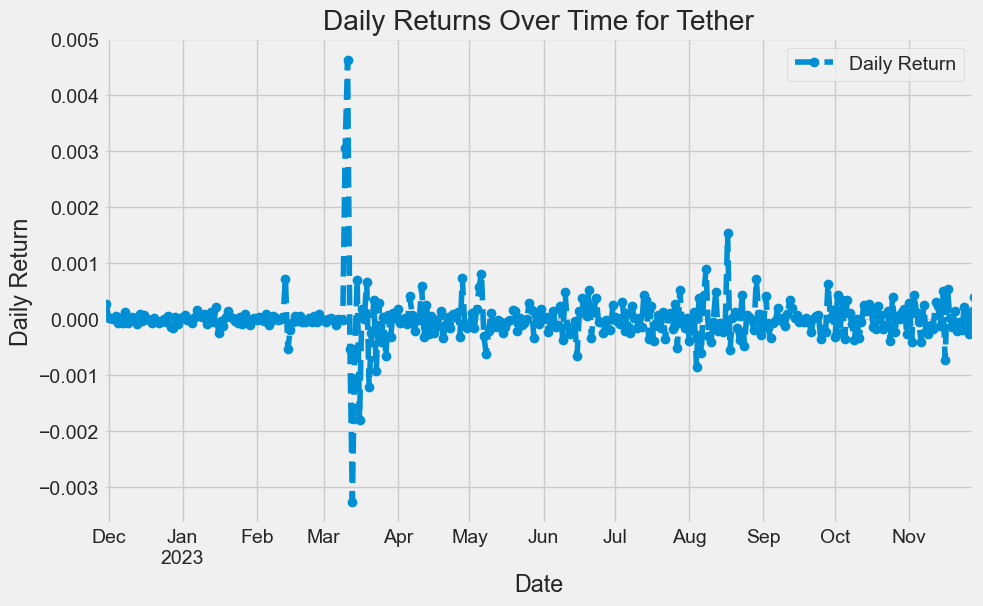

data/Daily_Returns_Over_Time_Binance Coin.png


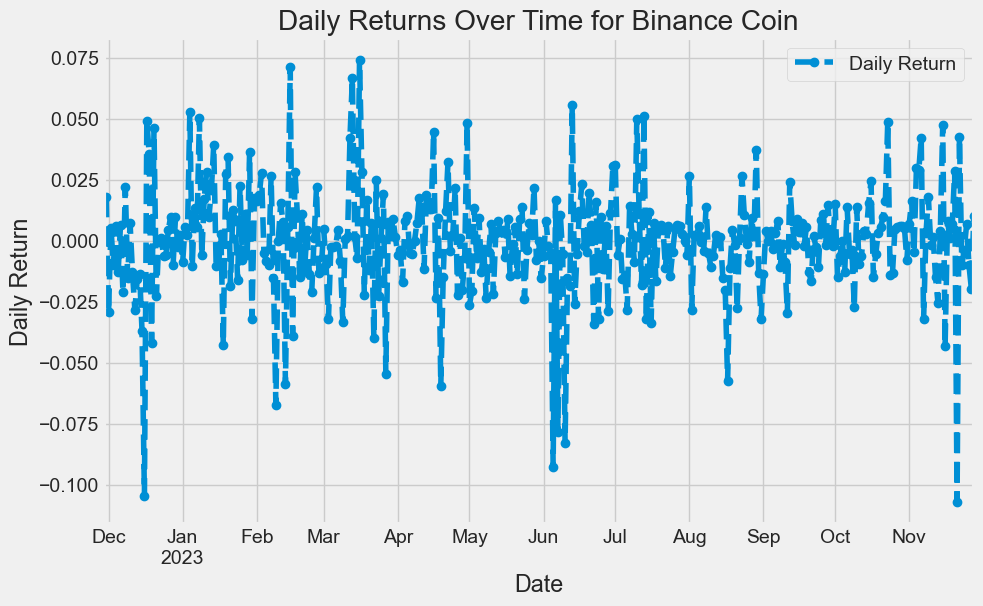

data/Daily_Returns_Over_Time_XRP.png


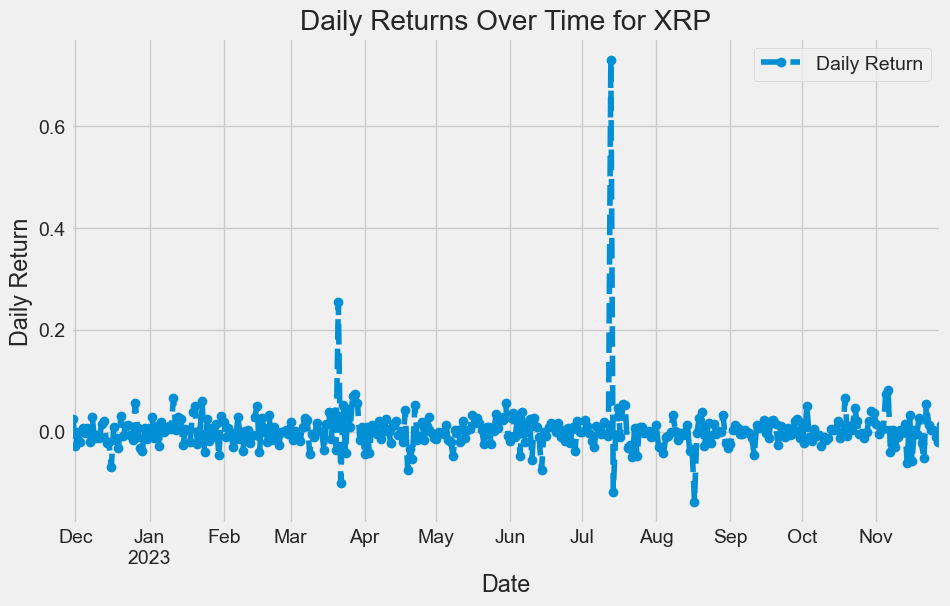

In [8]:
# Calculate the daily return for each cryptocurrency
for company in tech_list:
    company_data[company]['Daily Return'] = company_data[company]['Adj Close'].pct_change()

for company, name in zip(tech_list, company_name):
    # Create a new figure for each cryptocurrency
    plt.figure(figsize=(10, 6))
    
    # Plotting the daily return percentage
    company_data[company]['Daily Return'].plot(legend=True, linestyle='--', marker='o')
    
    # Set the title and labels
    plt.title(f'Daily Returns Over Time for {name}')
    plt.ylabel('Daily Return')
    plt.xlabel('Date')
    
    # Save the figure to a file
    plt.savefig(f"data/Daily_Returns_Over_Time_{name}.png")
    print(f"data/Daily_Returns_Over_Time_{name}.png")
    # Optional: Show the plot
    plt.show()
    
    # Optional: Close the plot to free up memory
    plt.close()


data/Histogram_of_Daily_Returns_Bitcoin.png


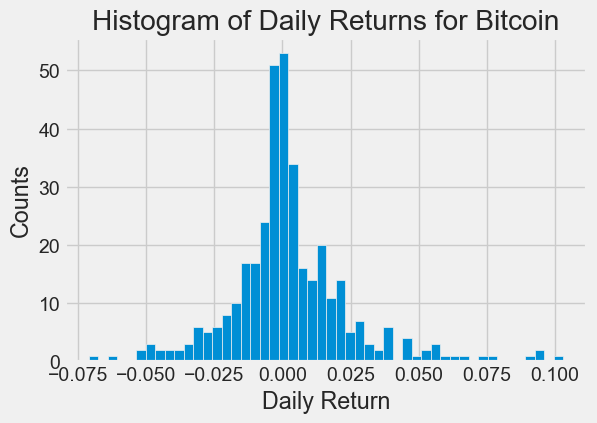

data/Histogram_of_Daily_Returns_Ethereum.png


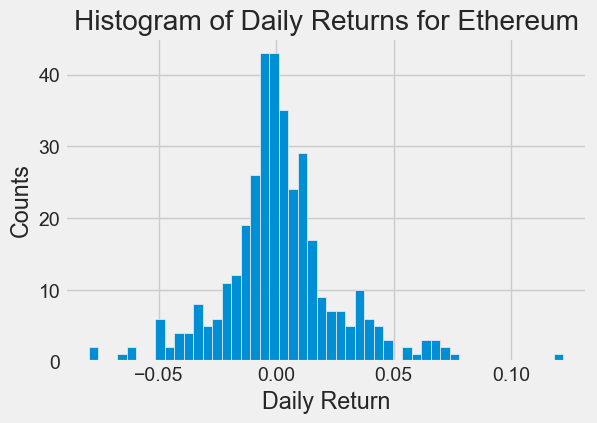

data/Histogram_of_Daily_Returns_Tether.png


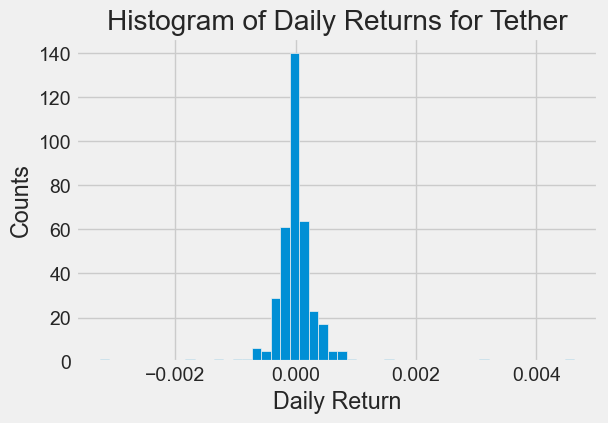

data/Histogram_of_Daily_Returns_Binance Coin.png


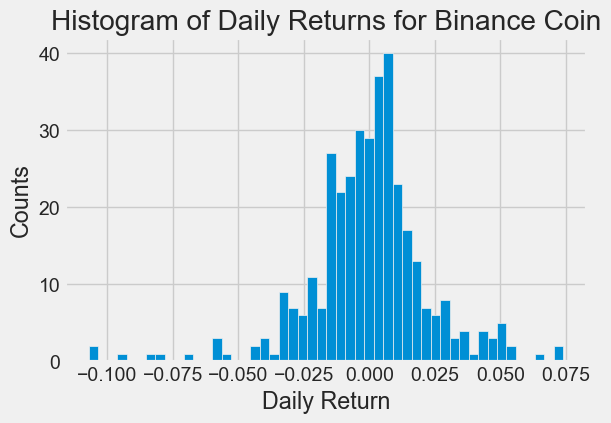

data/Histogram_of_Daily_Returns_XRP.png


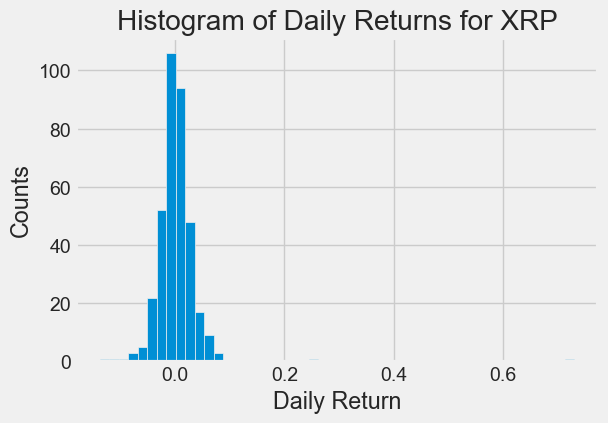

In [9]:
# Histogram of daily returns
for company, name in zip(tech_list, company_name):
    plt.figure(figsize=(6, 4))  # Create a new figure for each cryptocurrency
    
    # Plot histogram
    company_data[company]['Daily Return'].hist(bins=50)
    
    # Set title and labels
    plt.title(f'Histogram of Daily Returns for {name}')
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    
    # Save the figure to a file
    plt.savefig(f"data/Histogram_of_Daily_Returns_{name}.png")
    print(f"data/Histogram_of_Daily_Returns_{name}.png")
    # Optional: Show the plot
    plt.show()
    
    # Optional: Close the plot to free up memory
    plt.close()


# 6. Correlation Analysis

[*********************100%%**********************]  5 of 5 completed
data/Correlation_Daily_Returns.png


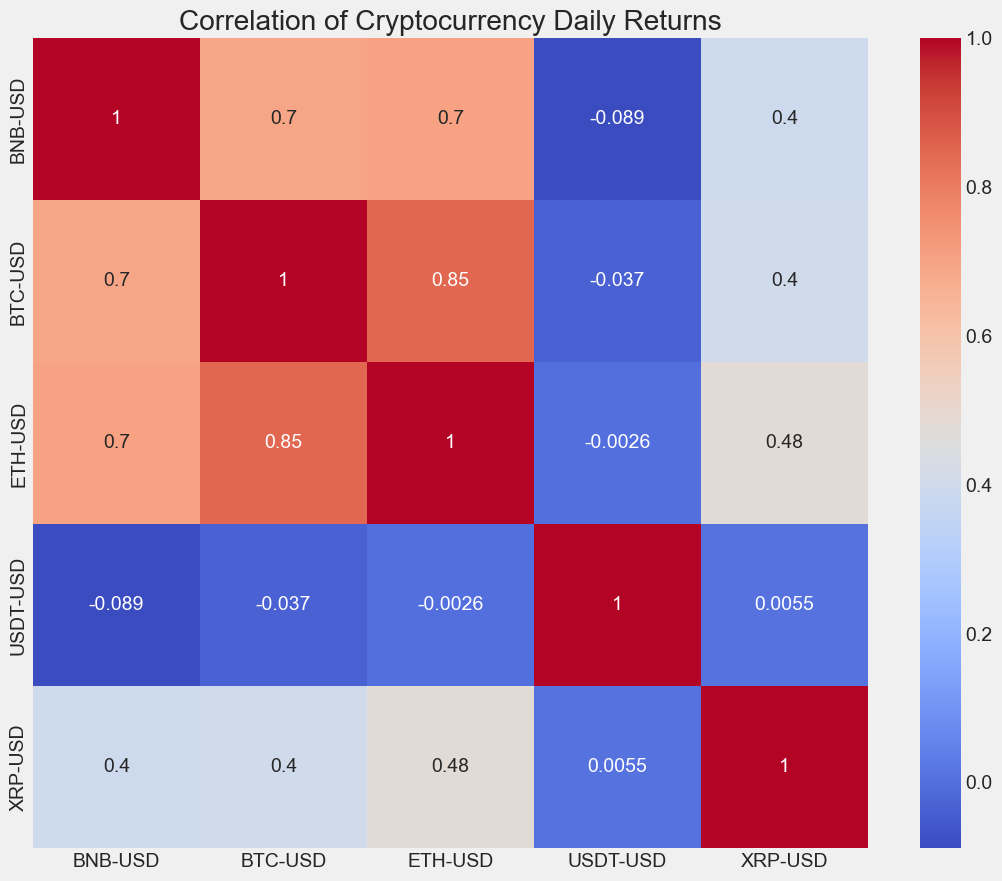

In [10]:
# Calculate the correlation between different cryptocurrencies based on their daily returns and closing prices
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
crypto_rets = closing_df.pct_change()

# Heatmap of daily return correlation
plt.figure(figsize=(12, 10))
sns.heatmap(crypto_rets.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Cryptocurrency Daily Returns')

plt.savefig("data/Correlation_Daily_Returns.png")
print("data/Correlation_Daily_Returns.png")
plt.show()



data/Correlation_Closing_Prices.png


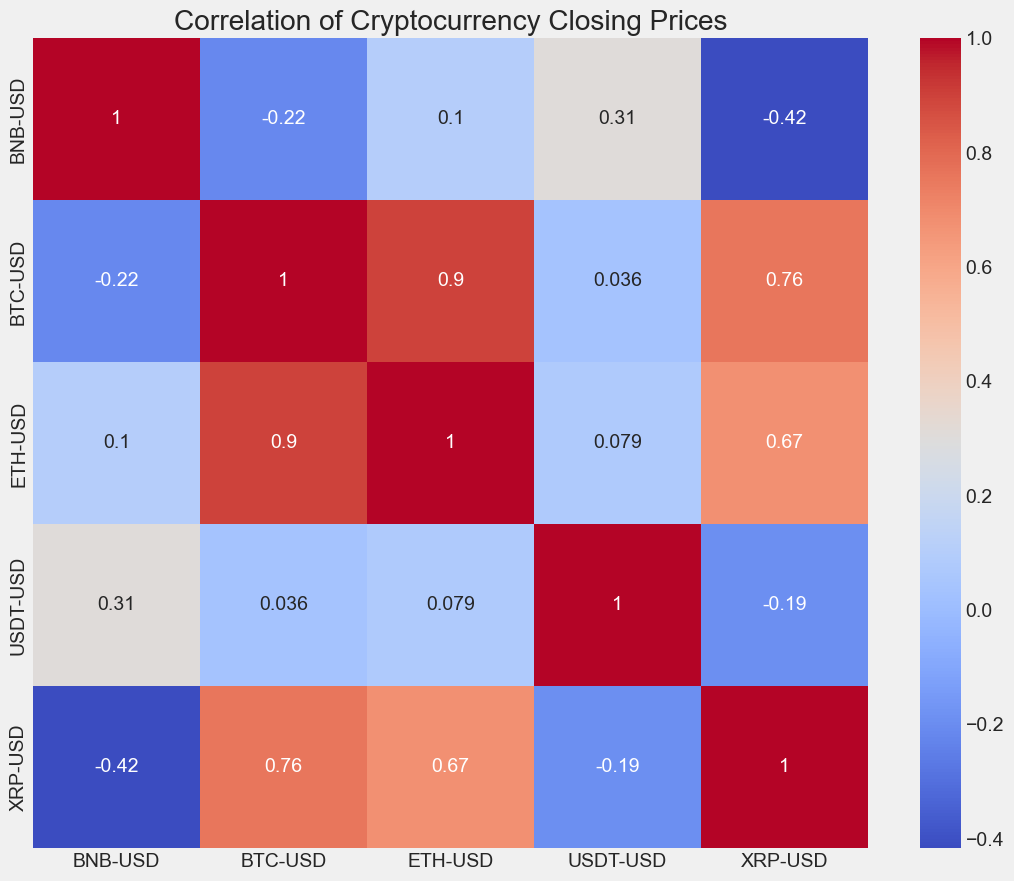

In [11]:
# Heatmap of closing price correlation
plt.figure(figsize=(12, 10))
sns.heatmap(closing_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Cryptocurrency Closing Prices')

plt.savefig("data/Correlation_Closing_Prices.png")
print("data/Correlation_Closing_Prices.png")
plt.show()

# 7. Risk vs Expected Return Analysis

data/Risk_vs_Expected_Return.png


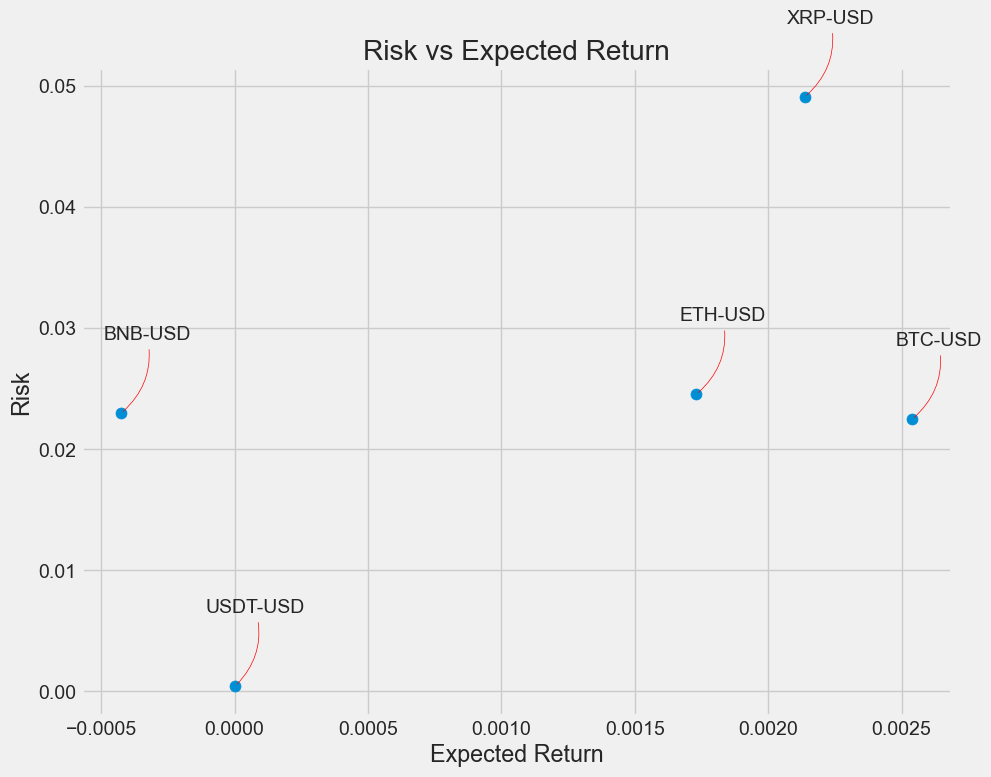

In [12]:
# Plotting Risk vs Expected Return for each cryptocurrency

rets = crypto_rets.dropna()
area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.title('Risk vs Expected Return')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x, y), xytext=(50, 50),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle='-', color='red', connectionstyle='arc3,rad=-0.3'))


plt.savefig("data/Risk_vs_Expected_Return.png")
print("data/Risk_vs_Expected_Return.png")
plt.show()


# 8. Machine Learning Models for Prediction

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM
import xgboost as xgb
from pandas_datareader import data as pdr
from datetime import datetime


### 8.1 LSTM Model for Prediction

In [14]:
def lstm_model(crypto_data, crypto_name):
    # Preprocessing
    data = crypto_data.filter(['Close'])
    dataset = data.values
    training_data_len = int(np.ceil(len(dataset) * .95))
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    train_data = scaled_data[0:int(training_data_len), :]
    x_train, y_train = [], []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    print("Running LSTM Model:-",crypto_name)
    # LSTM Model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs=1)
    
    # Prediction
    test_data = scaled_data[training_data_len - 60: , :]
    x_test = [test_data[i-60:i, 0] for i in range(60, len(test_data))]
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    predictions_lstm = model.predict(x_test)
    predictions_lstm_original = scaler.inverse_transform(predictions_lstm)
    r2_lstm = r2_score(dataset[training_data_len:, :], predictions_lstm_original)
    
    # Plotting
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions_LSTM'] = predictions_lstm_original
    plt.figure(figsize=(16,6))
    plt.title(f'{crypto_name} LSTM Model Predictions')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions_LSTM']])
    plt.legend(['Train', 'Actual', 'LSTM Predictions'], loc='lower right')
    plt.savefig(f"data/{crypto_name}_LSTM_Model_Predictions.png")
    plt.close()  # Close the plot to free up memory
    return r2_lstm, mean_squared_error(dataset[training_data_len:, :], predictions_lstm_original, squared=False)


### 8.2 Random Forest Model for Prediction

In [15]:
def random_forest_model(crypto_data, crypto_name):
    # Preprocessing
    data = crypto_data.filter(['Close'])
    dataset = data.values
    training_data_len = int(np.ceil(len(dataset) * .95))
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    train_data = scaled_data[0:int(training_data_len), :]
    x_train, y_train = [], []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train_rf = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))
    print("Running Random Forest Model:-",crypto_name)
    # Random Forest Model
    rf = RandomForestRegressor(n_estimators=1000, random_state=5)
    rf.fit(x_train_rf, y_train)

    # Prediction
    test_data = scaled_data[training_data_len - 60: , :]
    x_test = [test_data[i-60:i, 0] for i in range(60, len(test_data))]
    x_test_rf = np.array(x_test)
    x_test_rf = np.reshape(x_test_rf, (x_test_rf.shape[0], x_test_rf.shape[1]))
    predictions_rf = rf.predict(x_test_rf)
    predictions_rf_original = scaler.inverse_transform(predictions_rf.reshape(-1, 1))
    r2_rf = r2_score(dataset[training_data_len:, :], predictions_rf_original)
    rmse_rf = np.sqrt(mean_squared_error(dataset[training_data_len:, :], predictions_rf_original))

    # Plotting
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions_RF'] = predictions_rf_original
    plt.figure(figsize=(16,6))
    plt.title(f'{crypto_name} Random Forest Model Predictions')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions_RF']])
    plt.legend(['Train', 'Actual', 'Random Forest Predictions'], loc='lower right')
    plt.savefig(f"data/{crypto_name}_Random Forest_Model_Predictions.png")
    plt.close()  # Close the plot to free up memory
    return r2_rf, rmse_rf


### 8.3 XGBOOST Model for Prediction 

In [16]:

def xgboost_model(crypto_data, crypto_name):
    # Preprocessing
    data = crypto_data.filter(['Close'])
    dataset = data.values
    training_data_len = int(np.ceil(len(dataset) * .95))
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    train_data = scaled_data[0:int(training_data_len), :]
    x_train, y_train = [], []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train_xgb = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))
    print("Running XGBoost Model:-",crypto_name)
    # XGBoost Model
    data_dmatrix = xgb.DMatrix(data=x_train_xgb, label=y_train)
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=1000)
    xg_reg.fit(x_train_xgb, y_train)

    # Prediction
    test_data = scaled_data[training_data_len - 60: , :]
    x_test = [test_data[i-60:i, 0] for i in range(60, len(test_data))]
    x_test_xgb = np.array(x_test)
    x_test_xgb = np.reshape(x_test_xgb, (x_test_xgb.shape[0], x_test_xgb.shape[1]))
    predictions_xgb = xg_reg.predict(x_test_xgb)
    predictions_xgb_original = scaler.inverse_transform(predictions_xgb.reshape(-1, 1))
    r2_xgb = r2_score(dataset[training_data_len:, :], predictions_xgb_original)
    rmse_xgb = np.sqrt(mean_squared_error(dataset[training_data_len:, :], predictions_xgb_original))

    # Plotting
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions_XGB'] = predictions_xgb_original
    plt.figure(figsize=(16,6))
    plt.title(f'{crypto_name} XGBoost Model Predictions')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions_XGB']])
    plt.legend(['Train', 'Actual', 'XGBoost Predictions'], loc='lower right')
    plt.savefig(f"data/{crypto_name}_XGBoost_Model_Predictions.png")
    plt.close()  # Close the plot to free up memory
    return r2_xgb, rmse_xgb


In [17]:
def evaluate_models(tech_list, company_name):
    # Create a list to store the results
    results_list = []
    
    for idx, crypto in enumerate(tech_list):
        # Fetching data for each cryptocurrency
        crypto_data = pdr.get_data_yahoo(crypto, start='2012-01-01', end=datetime.now())
        
        # Call each model function
        lstm_results = lstm_model(crypto_data, company_name[idx])
        rf_results = random_forest_model(crypto_data, company_name[idx])
        xgb_results = xgboost_model(crypto_data, company_name[idx])
        
        # Collect the results into a dictionary
        results_dict = {
            'Cryptocurrency': company_name[idx],
            'LSTM R2 Score': lstm_results[0],
            'LSTM RMSE': lstm_results[1],
            'Random Forest R2 Score': rf_results[0],
            'Random Forest RMSE': rf_results[1],
            'XGBoost R2 Score': xgb_results[0],
            'XGBoost RMSE': xgb_results[1]
        }
        
        # Append the results dictionary to the results list
        results_list.append(results_dict)
    
    # Create the results DataFrame from the results list
    results_df = pd.DataFrame(results_list)
    
    return results_df

In [18]:

# List of cryptocurrencies and their names
tech_list = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'XRP-USD', 'DOGE-USD']
company_name = ["Bitcoin", "Ethereum", "Tether", "Binance Coin", "XRP", "Dogecoin"]



In [ ]:
# Evaluate models and get results DataFrame
results_df = evaluate_models(tech_list, company_name)

[*********************100%%**********************]  1 of 1 completed
Running LSTM Model:- Bitcoin
6/6 [==============================] - 1s 35ms/step


C:\Users\vijay\AppData\Local\Temp\ipykernel_25256\4008664914.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions_LSTM'] = predictions_lstm_original


Running Random Forest Model:- Bitcoin


C:\Users\vijay\AppData\Local\Temp\ipykernel_25256\1688264055.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions_RF'] = predictions_rf_original


Running XGBoost Model:- Bitcoin


C:\Users\vijay\AppData\Local\Temp\ipykernel_25256\1238349527.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions_XGB'] = predictions_xgb_original


[*********************100%%**********************]  1 of 1 completed
Running LSTM Model:- Ethereum
2041/2041 [==============================] - 70s 33ms/step - loss: 0.0022


In [ ]:
results_df

In [ ]:
# Save the results DataFrame to a CSV file
results_df.to_csv('data/results.csv', index=False)

In [ ]:
# Load results DataFrame
results_df = pd.read_csv('data/results.csv')

In [ ]:
results_df

In [ ]:
from flask import Flask, render_template, request, send_from_directory
import pandas as pd

app = Flask(__name__)

@app.route('/')
def index():
    companies = results_df['Cryptocurrency'].unique()
    models = ['LSTM', 'Random Forest', 'XGBoost']
    return render_template('index.html', companies=companies, models=models)

@app.route('/get_results', methods=['POST'])
def get_results():
    company = request.form['company']
    model = request.form['model']
    scores = results_df[results_df['Cryptocurrency'] == company].iloc[0].to_dict()
    return render_template('results.html', scores=scores, company=company, model=model)

@app.route('/show_all_models', methods=['GET'])
def show_all_models():
    # Assume results_df is a DataFrame containing your ML model results
    models_and_results = results_df.to_dict('records')
    return render_template('all_models.html', models_and_results=models_and_results)

@app.route('/get_image/<filename>')
def get_image(filename):
    return send_from_directory('data', filename)

if __name__ == '__main__':
    app.run(debug=False)